In [1]:
import numpy as np
from trips.utilities.io import *
from imports import *
plt.set_cmap('inferno')

<Figure size 640x480 with 0 Axes>

In [2]:
truth_ = generate_stempo2(data_set = 'simulation', data_thinning = 2, nt=30,new_shape=(128,128))

In [60]:

#Specify the shape of the images, the number of images in the sequence and load the image sequence using the gen_seq_function
nx= 128
ny = nx
shape = (nx,ny)
size = nx*ny
t_end = 5

v_max = 1
v_min = 1
padding = 2
data = gen_im_seq(shape,t_end,v_max=v_max,v_min=v_min, padding =padding)
u_traj = data.u_traj
u_inv_traj = data.u_inv_traj
v_primes=data.v_primes
vs=data.vs

# u_traj_ = np.load('mnist_test_seq.npy')[:,0,:,:][0:t_end]#*10
# u_traj = [vec(u) for u in u_traj_]

truth = truth_[20:20+t_end]
u_traj = [vec(u) for u in truth]


In [37]:
spread = [1,1]
dim = (3,3)

truth_extra = truth_[20:20+t_end+1]
u_traj_extra = [vec(u) for u in truth_extra]

noise_level = 1e-2
x_traj_extra =u_traj_extra # [u*10 for u in u_traj]# [vec(u) for u in u_traj]

X_true_extra, A_bar,data_vec_bar,data_vec_true_bar,L_bar, I_bar,deltas = gen_joint_blur_op_and_data2(x_traj_extra, t_end+1, nx,ny, spread,dim,noise_level=noise_level)

data already in the path.
data already in the path.
data already in the path.
data already in the path.
data already in the path.
data already in the path.


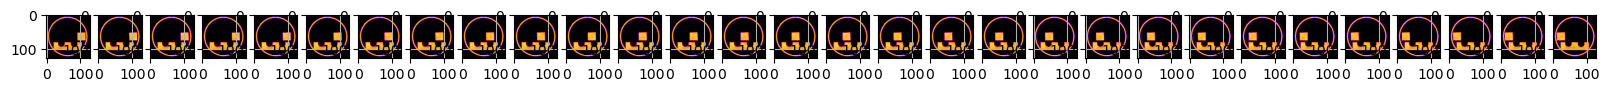

In [48]:
fig,ax=plt.subplots(1,30,figsize=(20,5))
for i in range(0,30):
    ax[i].imshow(truth_[i].reshape(shape))
    ax[i].grid('minor')

In [61]:
spread = [1,1]
dim = (3,3)

noise_level = 1e-2
x_traj =u_traj # [u*10 for u in u_traj]# [vec(u) for u in u_traj]

X_true, A_bar,data_vec_bar,data_vec_true_bar,L_bar, I_bar,deltas = gen_joint_blur_op_and_data2(x_traj, t_end, nx,ny, spread,dim,noise_level=noise_level)
b_size = shape[0]*shape[1]

delta = np.mean(deltas) #la.norm(data_vec_true_bar-data_vec_bar) #/#la.norm(data_vec_true_bar)
print(delta)

data already in the path.
data already in the path.
data already in the path.
data already in the path.
data already in the path.
0.3733798094965478


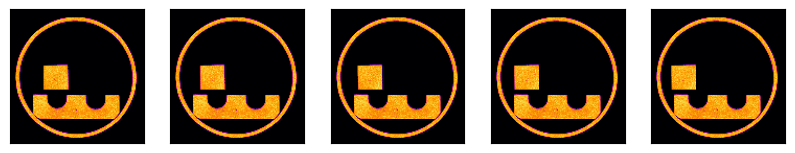

In [129]:
fig,ax=plt.subplots(1,t_end,figsize=(10,5))
for i in range(0,t_end):
    ax[i].imshow(x_true_list[i].reshape(shape))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

<Figure size 640x480 with 0 Axes>

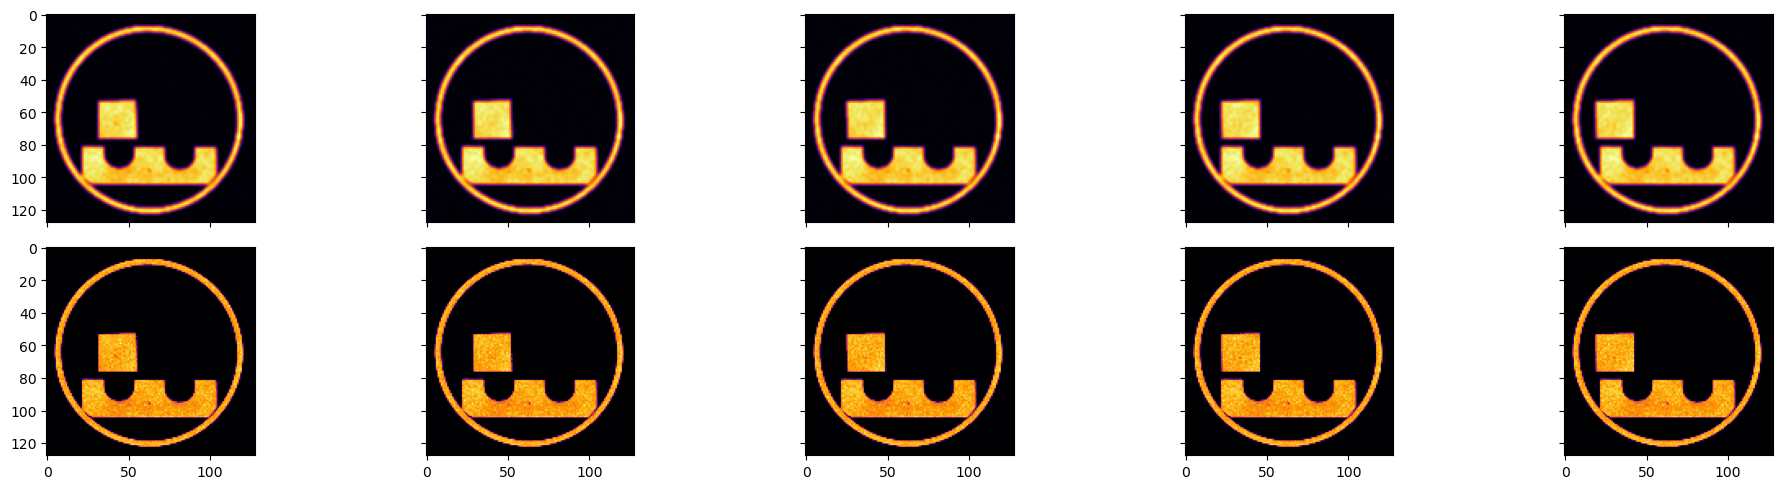

In [6]:
plt.set_cmap('inferno')
fig,ax=plt.subplots(2,t_end,sharex=True, sharey=True,figsize=(20,5))
data_vec_bar_list_c = [data_vec_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
data_vec_true_bar_list_c = [data_vec_true_bar[b_size*i:b_size*(i+1)] for i in range(t_end)]
x_true_list = [X_true[b_size*i:b_size*(i+1)] for i in range(t_end)]
for i in range(0,t_end):
    ax[0,i].imshow(data_vec_bar_list_c[i].reshape(shape))
    ax[1, i].imshow(x_true_list[i].reshape(shape))
plt.tight_layout()

## Scale: 2; n_iter_b = 10

In [121]:
#Number of iterations for the optical flow solution


n_iter = 40
n_iter_b = 10
proj_dim = 10
vs_true = None# vs 
v_primes_true= None#v_primes 
reduction = True
scale = 2
epsilon=1e-1
non_neg = False
v_max = 2
delta = 0.5

# MMGKS

from imports import *
from trips.solvers.MMGKS import *
# (X_mmgks_, info_mmgks_) = MMGKS(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
#                         n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,delta=delta)
# error_mmgks_ = info_mmgks_['relError'][-1]
# X_mmgks_list_ = [X_mmgks_[size*i:size*(i+1)] for i in range(t_end)]
# print(error_mmgks_)


# (X_mmgks_2, info_mmgks_2) = MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
#                         n_iter =n_iter, regparam = 'gcv', x_true = X_true.reshape((-1,1)), epsilon=epsilon,opt='nonscaled',delta=delta,non_neg=non_neg)
# error_mmgks_2 = info_mmgks_2['relError'][-1]
# X_mmgks_list_2 = [X_mmgks_2[size*i:size*(i+1)] for i in range(t_end)]
# print(error_mmgks_2)
# ##MMGKS

(X_mmgks, info_mmgks) = MMGKS2(A_bar, data_vec_bar, L_bar, pnorm=2, qnorm=1, projection_dim=proj_dim, 
                        n_iter =n_iter, regparam = 'dp', x_true = X_true.reshape((-1,1)), epsilon=epsilon,opt='nonscaled',delta=delta,non_neg=non_neg)
error_mmgks = info_mmgks['relError'][-1]

X_mmgks[X_mmgks<0]=0
X_mmgks_list = [X_mmgks[size*i:size*(i+1)] for i in range(t_end)]

print('MMGKS Solution relative error:', error_mmgks)

#ISO-TV
nt = t_end
L = gen_spacetime_derivative_operator(nx, ny, nt)
from trips.solvers.MMGKS import *
# Use GKS to compute an approximate solution
(X_TV_iso, info_TV_iso) = MMGKS(A_bar, data_vec_bar, L, pnorm=2, qnorm= 1, projection_dim=proj_dim, n_iter = n_iter, 
                                regparam = 'dp', x_true = X_true.reshape((-1,1)) , epsilon = epsilon, GS_option='gs', prob_dims = (nx,ny, nt),delta=delta)
error_TV_iso = info_TV_iso['relError'][-1]
X_TV_iso[X_TV_iso<0]=0
X_TV_iso_list = [X_TV_iso[size*i:size*(i+1)] for i in range(t_end)]
print('TV iso Solution relative error:', error_TV_iso)

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [00:30<00:00,  1.33it/s]


MMGKS Solution relative error: 0.05368350181313564


running MMGKS...: 100%|██████████| 40/40 [00:28<00:00,  1.40it/s]


TV iso Solution relative error: 0.05010021119965754


running MMGKS...: 100%|██████████| 40/40 [01:14<00:00,  1.87s/it]


Dynamic MMGKS Solution relative error: 0.04926796288595636


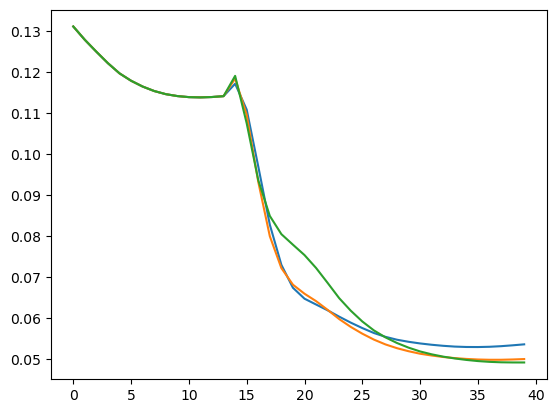

In [63]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [123]:
X_GS = X_TV_iso
print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.04789453887703679
RRE_GS 0.048812032799779935
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9985094825449572
SSIM_GS 0.9984559672044313


In [124]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.09670511704914544
SSIM_optical_flow_rec 0.9920529839137053


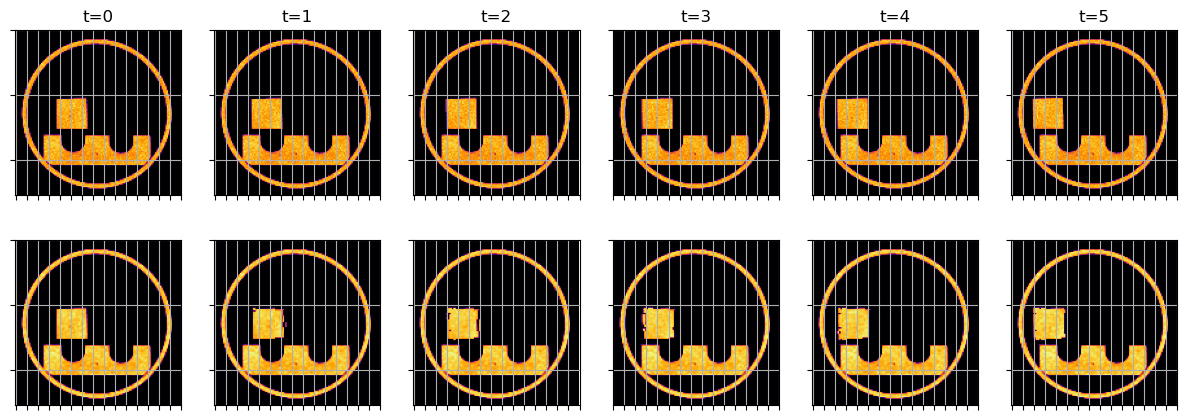

In [42]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [52]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.12530166669659035
SSIM_optical_flow_prediction 0.9763431080882398


In [43]:
folder = 'example_3/n_iter_b_10'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)

np.save(f'{folder}/X_mmgks.npy',X_mmgks)
np.save(f'{folder}/X_GS.npy',X_GS)
np.save(f'{folder}/relError_mmgks.npy',info_mmgks['relError'])
np.save(f'{folder}/relError_GS.npy',info_GS['relError'])
np.save(f'{folder}/regParam_mmgks.npy',info_mmgks['regParam_history'])
np.save(f'{folder}/regParam_GS.npy',info_GS['regParam_history'])

## Scale:2; n_iter_b: 20

In [64]:
n_iter_b = 20

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [01:31<00:00,  2.29s/it]

Dynamic MMGKS Solution relative error: 0.049335469780203825


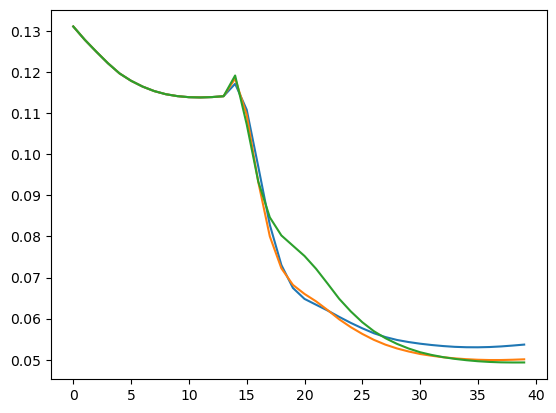

In [65]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [66]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.04799723056957516
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.998504293962144
SSIM_GS 0.9984489377747332


In [67]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.08988512985992193
SSIM_optical_flow_rec 0.9931344673695475


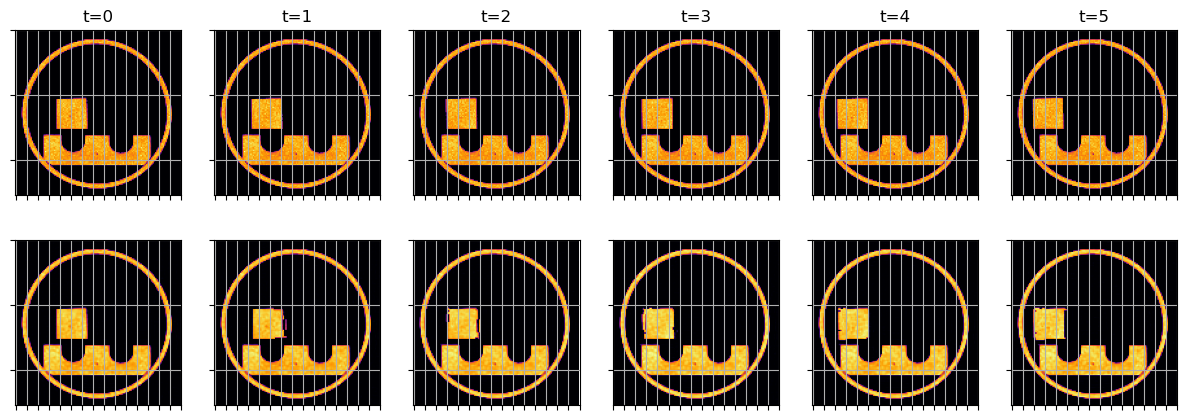

In [68]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [69]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.11830484452927366
SSIM_optical_flow_prediction 0.9783656987172519


In [70]:
folder = 'example_3/n_iter_b_20'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:2; n_iter_b: 40

In [71]:
n_iter_b = 40

## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]

running MMGKS...: 100%|██████████| 40/40 [02:40<00:00,  4.02s/it]

Dynamic MMGKS Solution relative error: 0.049284514530056625


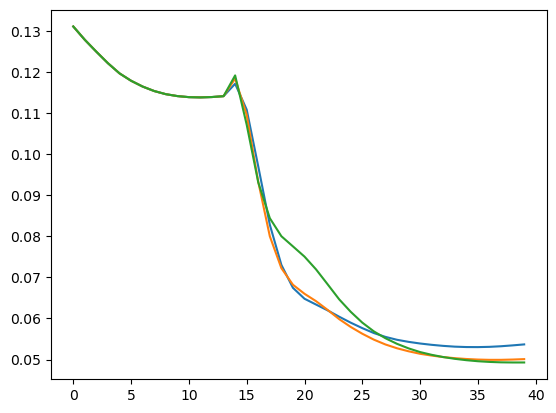

In [72]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [73]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.04794867908654847
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9985073578189126
SSIM_GS 0.9984489377747332


In [74]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.08775487414026019
SSIM_optical_flow_rec 0.9934478687419805


In [136]:
X_true.min()

0.0011764707

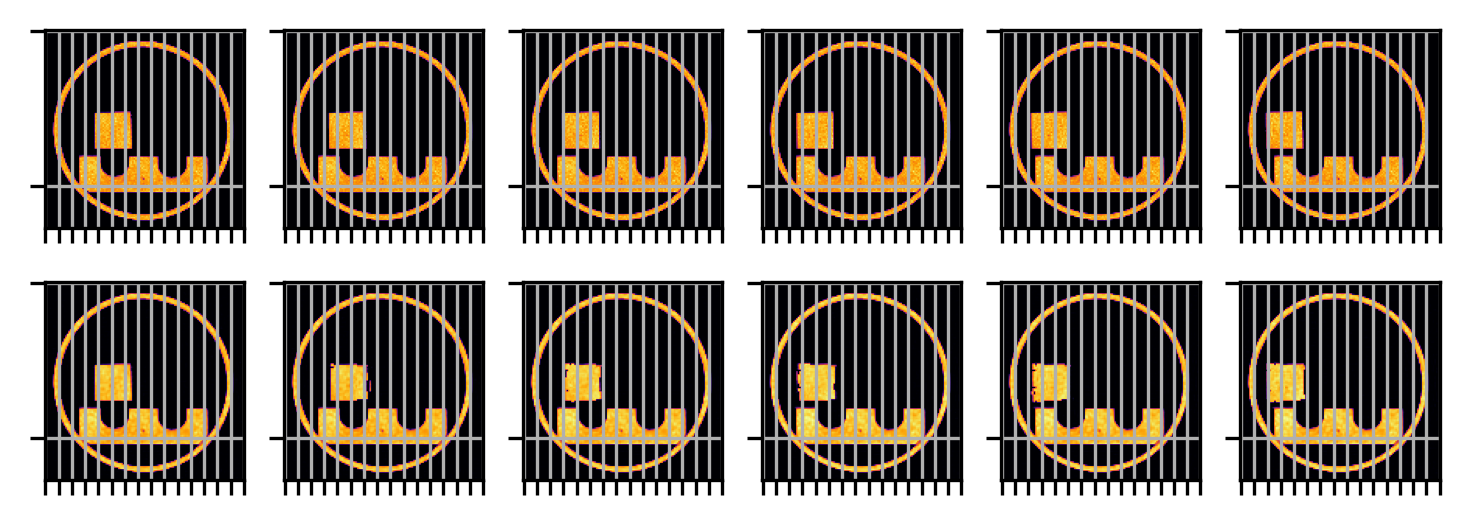

In [134]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,dpi=300,figsize=(6,2),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    # ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
plt.savefig("example 3 - scale 2 - prediction.png",bbox_inches='tight')
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [76]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.11358128401126125
SSIM_optical_flow_prediction 0.9806161772629668


In [77]:
folder = 'example_3/n_iter_b_40'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:4; n_iter_b: 10

In [78]:
n_iter_b = 10
scale = 4
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...:   0%|          | 0/40 [00:00<?, ?it/s]c:\Users\okuno\anaconda3\Lib\site-packages\scipy\sparse\_index.py:134: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
running MMGKS...: 100%|██████████| 40/40 [01:16<00:00,  1.90s/it]

Dynamic MMGKS Solution relative error: 0.04914858648912516


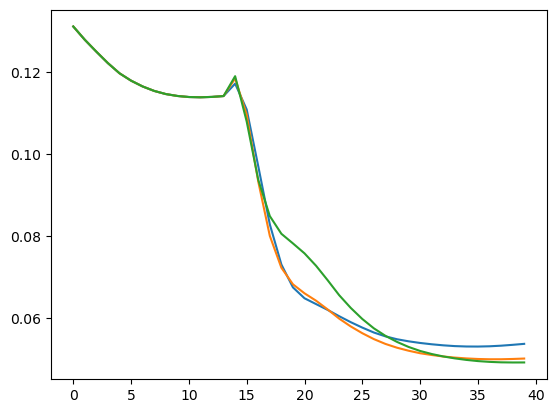

In [79]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [80]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.047810941106100055
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.99851591433574
SSIM_GS 0.9984489377747332


In [81]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.10309565396508868
SSIM_optical_flow_rec 0.9909670362227561


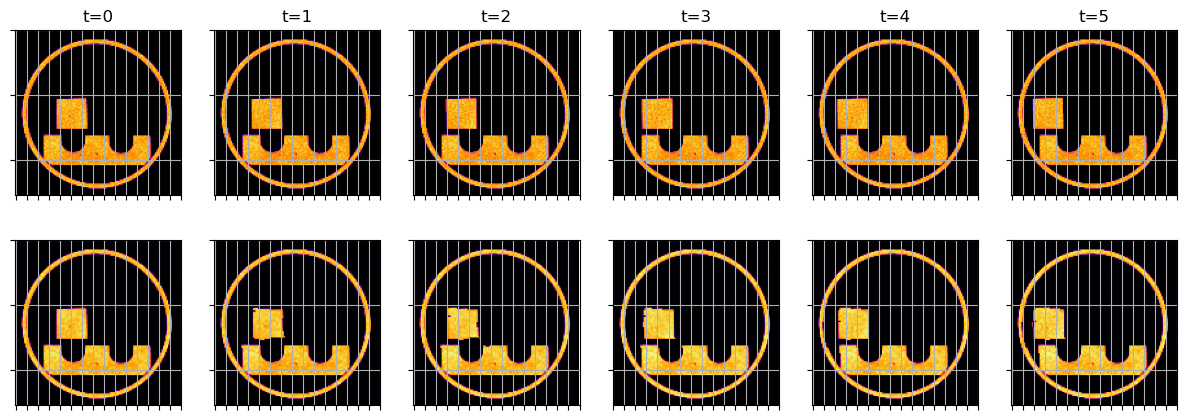

In [82]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [83]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.1427946125751135
SSIM_optical_flow_prediction 0.9808637010595127


In [85]:
folder = 'example_3/n_iter_b_10_scale_4'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:4; n_iter_b: 20

In [86]:
n_iter_b = 20
scale = 4
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [01:16<00:00,  1.90s/it]

Dynamic MMGKS Solution relative error: 0.04929333160860135


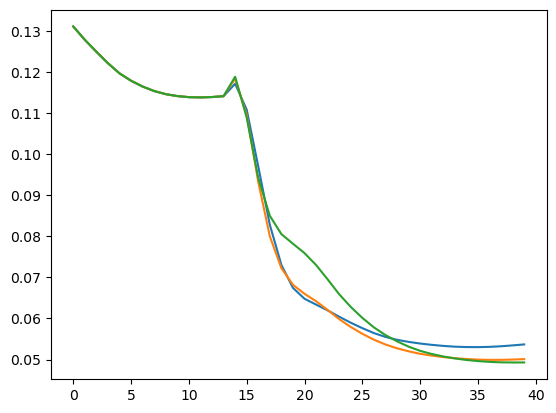

In [87]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [88]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.047937530806561386
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9985074481942681
SSIM_GS 0.9984489377747332


In [89]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.10276685504657226
SSIM_optical_flow_rec 0.9910205720612395


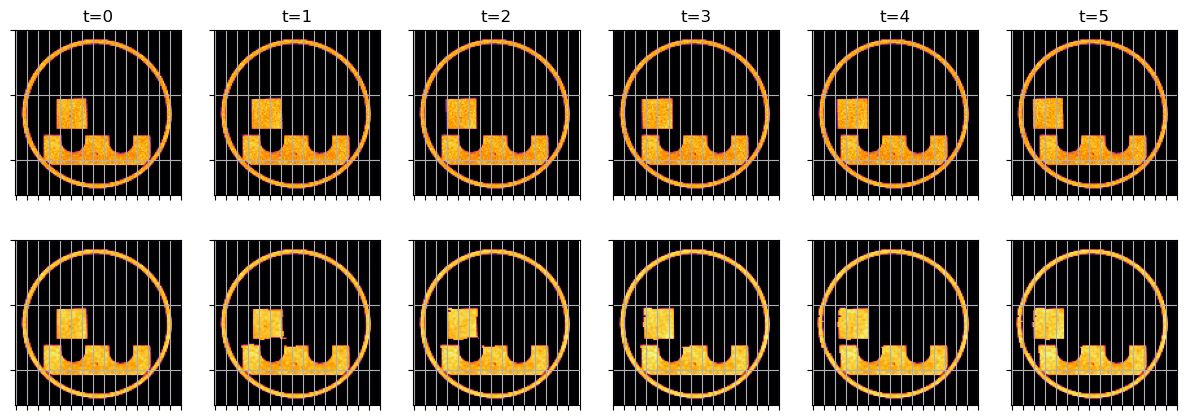

In [90]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [91]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.18043667747469902
SSIM_optical_flow_prediction 0.9669493051652598


In [92]:
folder = 'example_3/n_iter_b_20_scale_4'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:4; n_iter_b: 40

In [93]:
n_iter_b = 40
scale = 4
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [01:16<00:00,  1.90s/it]

Dynamic MMGKS Solution relative error: 0.049409595480858715


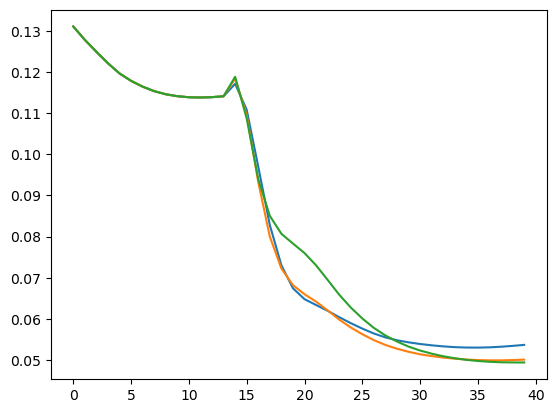

In [94]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [95]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.048047169504779164
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9985004600761005
SSIM_GS 0.9984489377747332


In [96]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.10292332272685314
SSIM_optical_flow_rec 0.990993933022381


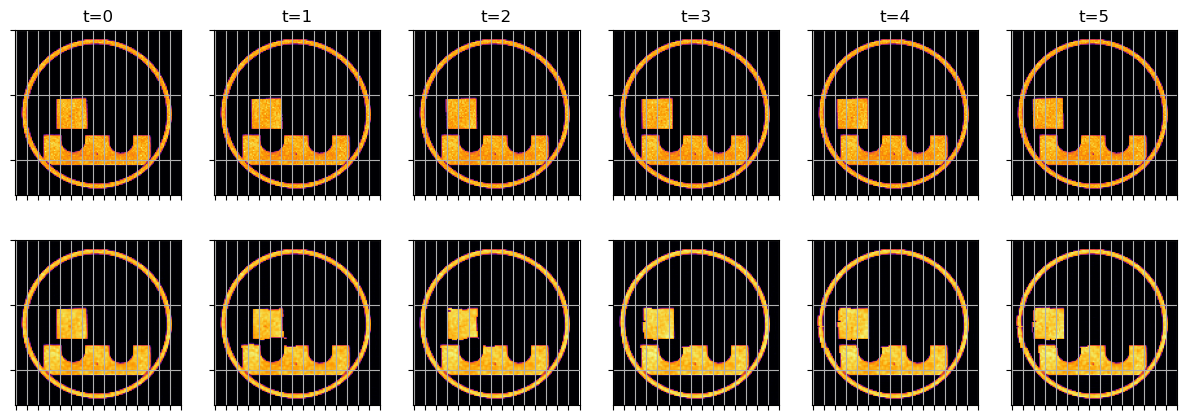

In [97]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [98]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.17732735346288908
SSIM_optical_flow_prediction 0.9661471112945742


In [99]:
folder = 'example_3/n_iter_b_40_scale_4'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:8; n_iter_b: 10

In [100]:
n_iter_b = 10
scale = 8
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [00:44<00:00,  1.12s/it]

Dynamic MMGKS Solution relative error: 0.050291229330083904


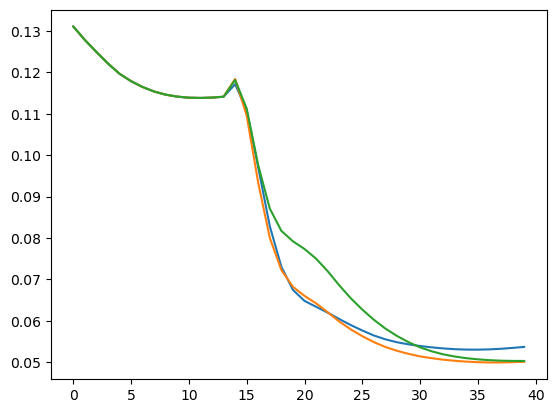

In [101]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [102]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.04875656357450034
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9984511371676847
SSIM_GS 0.9984489377747332


In [103]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.1953307307756013
SSIM_optical_flow_rec 0.9673115517912113


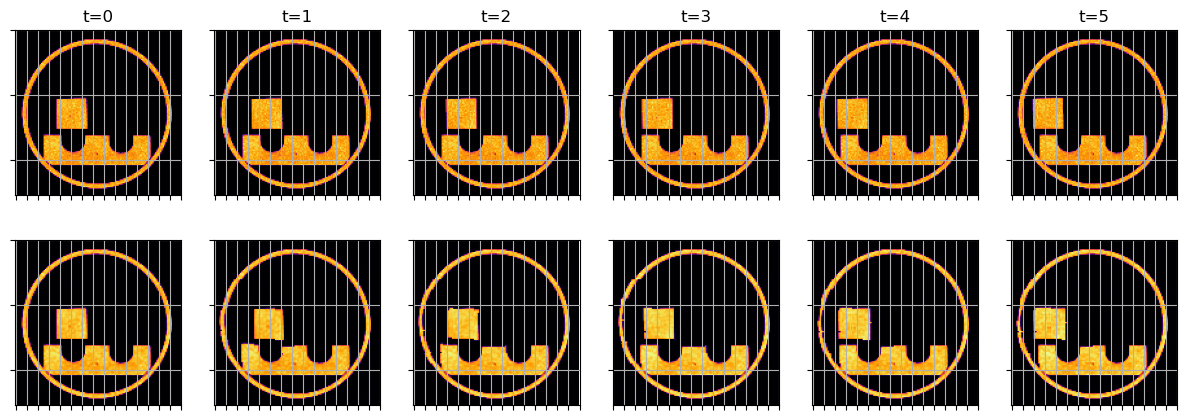

In [104]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [105]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.2551607550675688
SSIM_optical_flow_prediction 0.9497345905393295


In [106]:
folder = 'example_3/n_iter_b_10_scale_8'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:8; n_iter_b: 20

In [107]:
n_iter_b = 20
scale = 8
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

running MMGKS...: 100%|██████████| 40/40 [01:15<00:00,  1.88s/it]


Dynamic MMGKS Solution relative error: 0.051968038521673185


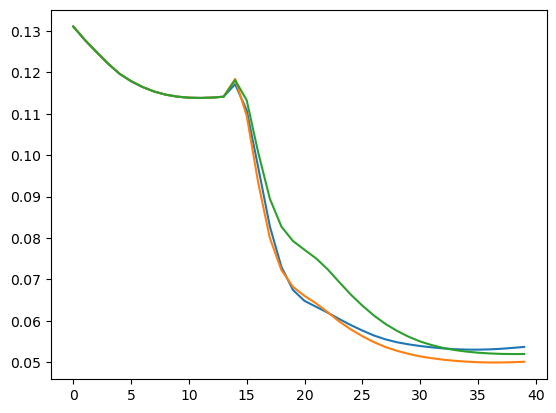

In [108]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [109]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.050335606750742404
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9983465730519334
SSIM_GS 0.9984489377747332


In [110]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.22010456671335907
SSIM_optical_flow_rec 0.9585761428808646


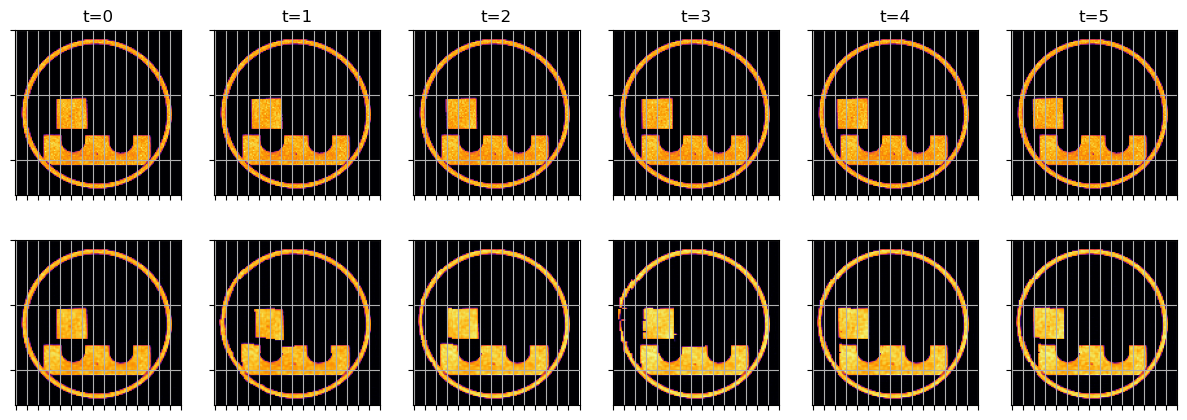

In [111]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [112]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.29862879302378786
SSIM_optical_flow_prediction 0.9349301635541307


In [113]:
folder = 'example_3/n_iter_b_20_scale_8'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)


## Scale:8; n_iter_b: 40

In [114]:
n_iter_b = 40
scale = 8
## DYNAMIC MMGKS

(X_mmgks_dyn, info_mmgks_dyn, vs_est, v_primes_est) = MMGKS_dyn_joint_(A_bar, data_vec_bar, L_bar, I_bar, t_end,shape,pnorm=2,
qnorm=1, rnorm=1, projection_dim=proj_dim, n_iter =n_iter, n_iter_b = n_iter_b, regparam = 'dp', regparam_dyn = 'dp',vs_true = vs_true, v_primes_true=v_primes_true,  v_max=v_max, 
x_true = X_true.reshape((-1,1)), reduction = reduction, scale=scale,epsilon=epsilon,delta =delta,pnorm_opt=2, qnorm_opt=2,non_neg=non_neg,interval = 10)

error_mmgks_dyn = info_mmgks_dyn['relError'][-1]
Ms = info_mmgks_dyn['Ms']
M_primes = info_mmgks_dyn['M_primes']

X_mmgks_dyn[X_mmgks_dyn<0]=0
X_mmgks_dyn_list = [X_mmgks_dyn[size*i:size*(i+1)] for i in range(t_end)]

print('Dynamic MMGKS Solution relative error:', error_mmgks_dyn)

generating basis...:   0%|          | 0/10 [00:00<?, ?it/s]

running MMGKS...: 100%|██████████| 40/40 [01:34<00:00,  2.35s/it]

Dynamic MMGKS Solution relative error: 0.05169998327896414


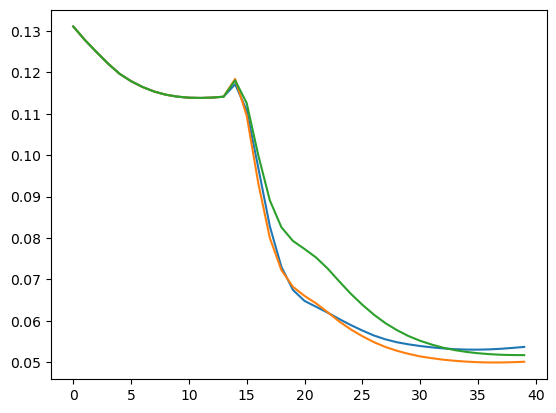

In [115]:
info_GS = info_TV_iso
plt.plot(info_mmgks['relError'])
plt.plot(info_GS['relError'])
plt.plot(info_mmgks_dyn['relError'])

In [116]:

print('RRE_MMGKS',rre_all(X_mmgks,X_true,nt,nx,ny))
print('RRE_MMGKS_DYN',rre_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('RRE_GS',rre_all(X_GS,X_true,nt,nx,ny))
print('SSIM_MMGKS',ssim_all(X_mmgks,X_true,nt,nx,ny))
print('SSIM_MMGKS_DYN',ssim_all(X_mmgks_dyn,X_true,nt,nx,ny))
print('SSIM_GS',ssim_all(X_GS,X_true,nt,nx,ny))

RRE_MMGKS 0.05228027853065873
RRE_MMGKS_DYN 0.050084442489171835
RRE_GS 0.04892652571782875
SSIM_MMGKS 0.9982257475968979
SSIM_MMGKS_DYN 0.9983633219734553
SSIM_GS 0.9984489377747332


In [117]:
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end-1):
    M_prime = M_primes[i]
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)

print('RRE_optical_flow_rec',rre_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))
print('SSIM_optical_flow_rec',ssim_all(rec_list[:nt-1],X_mmgks_dyn.reshape(nt,nx,ny)[:nt-1],nt-1,nx,ny))

RRE_optical_flow_rec 0.20363479311525023
SSIM_optical_flow_rec 0.9645387711942703


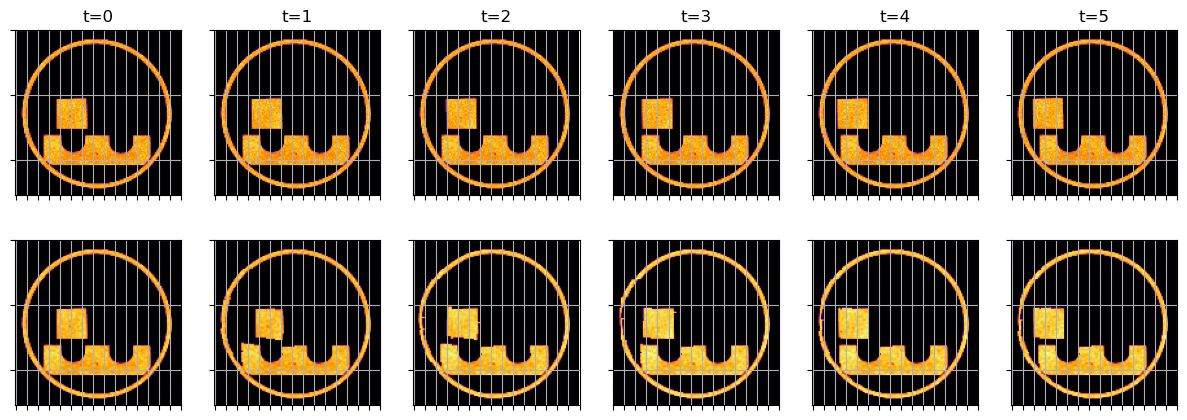

In [118]:
# rec_list = [X_mmgks_dyn_list[-1]]
# for i in range(t_end-1):
#     M = Ms[::-1][i]
#     next_ = M@rec_list[-1]
#     rec_list.append(next_)
rec_list = [X_mmgks_dyn_list[0]]
for i in range(t_end):
    if (i==t_end - 1): 
        M_prime = M_primes[t_end-2]
    else:    
        M_prime = M_primes[i]
    
    next_ = M_prime@X_mmgks_dyn_list[i] #[-1]
    rec_list.append(next_)
fig,ax=plt.subplots(2,t_end+1,figsize=(15,5),sharex=True, sharey=True)

for i in range(0,t_end + 1):
    ax[0,i].imshow(X_true_extra.reshape(nt+1,nx,ny)[i].reshape(shape))
    ax[1,i].imshow(rec_list[i].reshape(shape))
    ax[0,i].set_title(f't={i}')
    ax[0,i].grid('minor')
    ax[1,i].grid('minor')
    major_ticks = np.linspace(0, nx,16)
    minor_ticks = np.linspace(0, nx,16)

    ax[0,i].set_xticks(minor_ticks,minor=True)
    ax[1,i].set_xticks(minor_ticks, minor=True)
    ax[0,i].set_xticks(major_ticks)
    ax[1,i].set_xticks(major_ticks)
    ax[1,i].tick_params(labelbottom=False)
    ax[0,i].tick_params(labelleft=False)
    ax[1,i].tick_params(labelleft=False)
plt.subplots_adjust(wspace=None, hspace=None)
# fig.suptitle('Recovered Solutions to the Regularized Problem' + '\n' + '\n' + '(Top Row: Recovered with MMGKS' + '\n'+ '\n'  + 
#              'Bottom Row: Recovered with Dynamic MMGKS)' + '\n' + ' ' );

In [119]:
print('RRE_optical_flow_prediction',rre(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1]))
print('SSIM_optical_flow_prediction',ssim(rec_list[-1].reshape(shape),X_true_extra.reshape(nt+1,nx,ny)[-1],nx,ny))

RRE_optical_flow_prediction 0.2777532295028608
SSIM_optical_flow_prediction 0.9442834875545016


In [120]:
folder = 'example_3/n_iter_b_40_scale_8'

np.save(f'{folder}/X_mmgks_dyn.npy',X_mmgks_dyn)
np.save(f'{folder}/relError_mmgks_dyn.npy',info_mmgks_dyn['relError'])
np.save(f'{folder}/regParam_mmgks_dyn.npy',info_mmgks_dyn['regParam_history'])
np.save(f'{folder}/Ms.npy',Ms)
np.save(f'{folder}/M_primes.npy',M_primes)
